# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievment4/Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_grouped.pkl'))

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

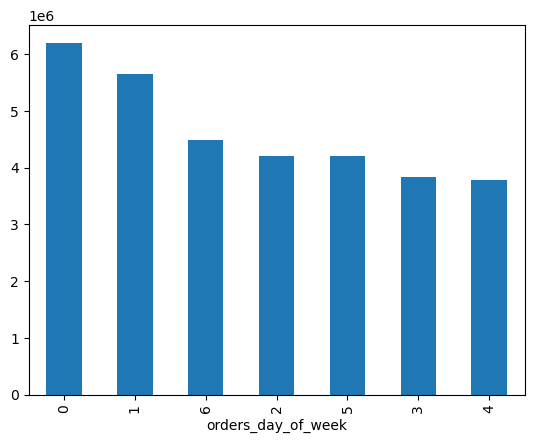

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

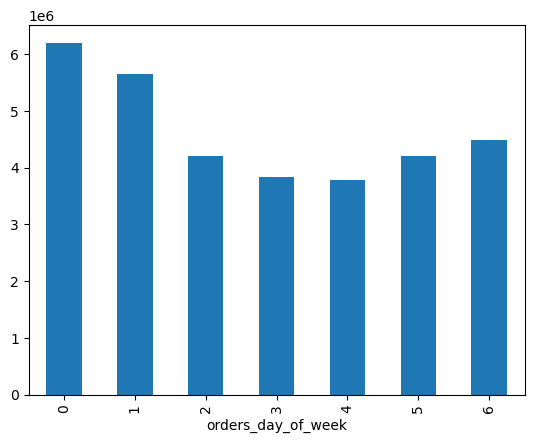

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms

<Axes: ylabel='Frequency'>

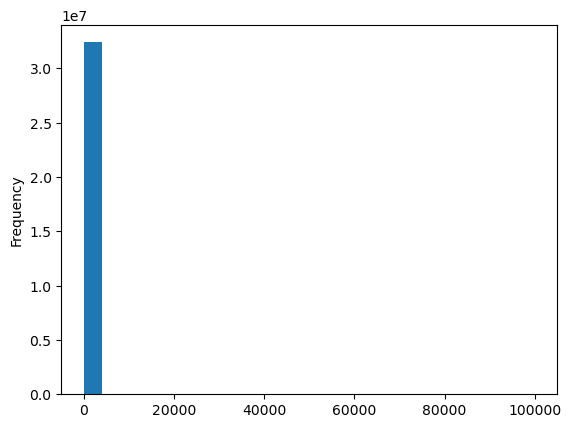

In [8]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [9]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

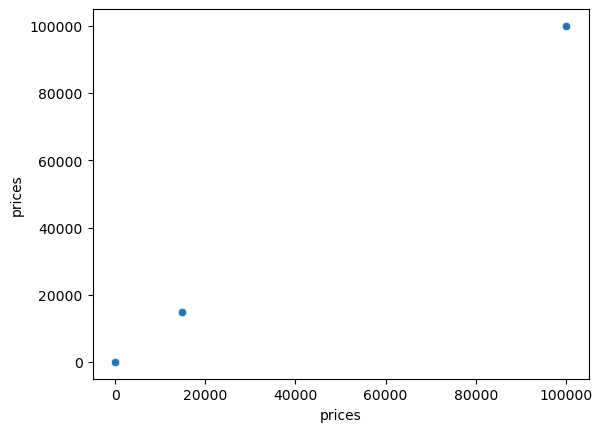

In [10]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [12]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

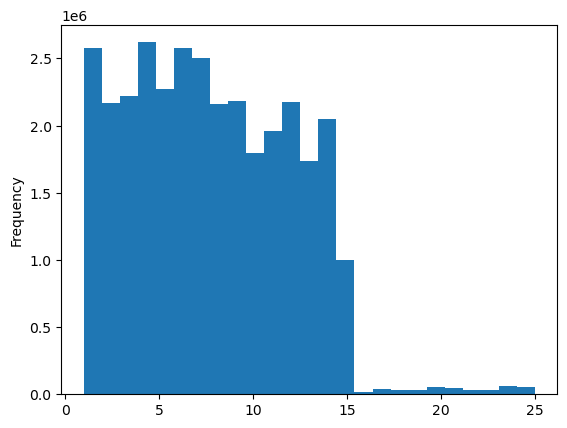

In [14]:
ords_prods_merge['prices'].plot.hist(bins = 25)

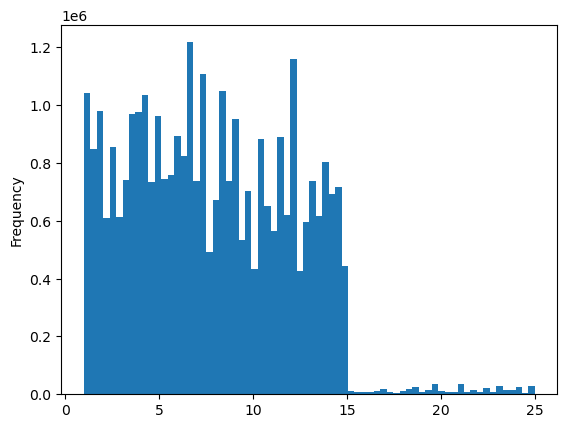

In [16]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram.png'))

# Sampling Data

In [18]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
big = ords_prods_merge[dev]

In [24]:
small = ords_prods_merge[~dev]

In [25]:
len(ords_prods_merge)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
df_2 = small[['orders_day_of_week','prices']]

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


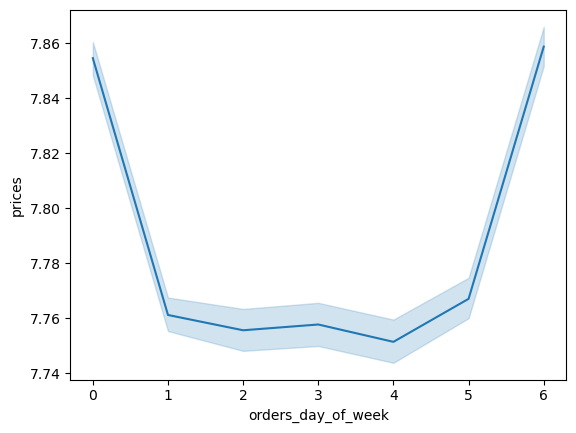

In [28]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')